In [1]:
import warnings
import awkward as ak
import numpy as np
import pickle
import hist as hs
from coffea import processor
from coffea.nanoevents.methods import vector, candidate
from coffea.nanoevents import NanoEventsFactory,BaseSchema
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import subprocess as sp
import os

In [2]:
genfiltereff = {
    'NEW':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 0.2140541025727333, 
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 0.2919021657580153, 
            'PhiToPi0Pi0_mPhi0p3_ctau300': 0.2913132061492869, 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 0.2133676092544987}, 
            #'background': 1,
        },
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 0.2140541025727333, 
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 0.2919021657580153, 
            'PhiToPi0Pi0_mPhi0p3_ctau300': 0.2913132061492869, 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 0.2133676092544987,
            #'background': 1,
        }
    },
    'OLD':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }        
    }
}

muonfiltereff = {
    'NEW':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 0.00514,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 0.00514,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 0.00514,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 0.00514,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 0.00514,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 0.00514,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 0.00514,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 0.00514,
            #'background': 1
        }
    },
    'OLD':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }        
    }
}

lumi = {
    'NEW':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 41.6,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 41.6,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 41.6,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 41.6,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 41.6,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 41.6,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 41.6,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 41.6,
            #'background': 1
        }
    },
    'OLD':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }        
    }
}

xsec = {
    'NEW':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 472.8e9/4e-1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 472.8e9/4e-1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 472.8e9/4e-1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 472.8e9/4e-1,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 472.8e9/4e-1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 472.8e9/4e-1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 472.8e9/4e-1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 472.8e9/4e-1,
            #'background': 1
        }
    },
    'OLD':{
        'CSC':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1,
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }, 
        'DT':{
            #'PhiToPiPlusPiMinus_mPhi0p3_ctau1000': 1,
            'PhiToPiPlusPiMinus_mPhi0p3_ctau300': 1,
            'PhiToPi0Pi0_mPhi0p3_ctau300': 1 
            #'PhiToPi0Pi0_mPhi0p3_ctau1000': 1,
            #'background': 1
        }        
    }
}

data = {
    'OLD':{},
    'NEW':{},
}
for filename in os.listdir('Pickles'):
    if filename.endswith('.pickle'):
        with open('Pickles/' + filename, 'rb') as file:
            if 'OLD' in filename:
                data['OLD'][filename[18:-7]] = pickle.load(file)
            else:
                data['NEW'][filename[14:-7]] = pickle.load(file)
            


In [3]:
nEvents = {
    age: {
        sys: {
            dataset:{
                cut[10:]: data[age][sys][dataset][cut]
                for cut in data[age][sys][dataset]
                if 'numEvents' in cut 
                and cut[-2:] != 'SF'
            }
            for dataset in data[age][sys]
            if dataset[-4:] not in ['vars','cuts']             
        }
        for sys in data[age]
    }
    for age in data
}

nEvents_SF = {
    age: {
        sys: {
            dataset:{
                cut[10:-3]: data[age][sys][dataset][cut]
                for cut in data[age][sys][dataset]
                if 'numEvents' in cut 
                and cut[-2:] == 'SF'
            }
            for dataset in data[age][sys]
            if dataset[-4:] not in ['vars','cuts'] 
        }
        for sys in data[age]
    }
    for age in data
}

gllp_ctaus = {
    age: {
        sys: {
            dataset[:-5]:{
                cut[15:]: data[age][sys][dataset][cut]
                for cut in data[age][sys][dataset]
                if 'gLLP_ctau' in cut 
            }
            for dataset in data[age][sys]
            if dataset[-4:] == 'vars'
        }
        for sys in data[age]
    }
    for age in data
}


muon_SFs = {
    age: {
        sys: {
            dataset[:-5]:{
                cut[12:]: data[age][sys][dataset][cut]
                for cut in data[age][sys][dataset]
                if 'muonSF' in cut 
            }
            for dataset in data[age][sys]
            if dataset[-4:] == 'vars'
        }
        for sys in data[age]
    }
    for age in data
}

gllp_limit = {
    age: {
        sys: {
            dataset[:-5]:{}
            for dataset in data[age][sys]
            if dataset[-4:] == 'vars'
        }
        for sys in data[age]
    }
    for age in data
}


#hot fixes
nEvents['OLD']['CSC']['background'] = nEvents['NEW']['CSC']['background']
nEvents['OLD']['DT']['background'] = nEvents['NEW']['DT']['background']

nEvents_SF['OLD']['CSC'] = nEvents['OLD']['CSC']
nEvents_SF['OLD']['DT'] = nEvents['OLD']['DT']

KeyError: 'CSC'

In [ ]:
INVcut_based_ID = nEvents['NEW']['CSC']['background']['|cls_eta| < 1.9']-nEvents['NEW']['CSC']['background']['cut_based_ID']

INVcls_size = nEvents['NEW']['CSC']['background']['cut_based_ID'] - nEvents['NEW']['CSC']['background']['cls_size > 130']

print(list(nEvents['NEW']['CSC']['background'].keys()))

In [ ]:
for age in ["NEW", "OLD"]:
    for sys in ['CSC', 'DT']:
        for dataset in genfiltereff[age][sys]:
            
            if sys == "CSC":
                num_cut = 'cls_size > 130'
                
                if age == 'OLD':
                    dem_cut = 'posttrigger'
                if age == 'NEW':
                    dem_cut = 'pretrigger'
                    
            if sys == "DT":
                num_cut = 'cluster_size_100'
                
                if age == 'OLD':
                    dem_cut = 'eventHLT_cut'
                if age == 'NEW':
                    dem_cut = 'pretrigger'

            if 'ctau1000' in dataset:
                old_ctau = 100
            if 'ctau300' in dataset:
                old_ctau = 30

            N_bb = 5e9
            N_bb_p = .02

            ctau_list = np.logspace(-.3, 4, 50)
            new_nEvents = np.zeros_like(ctau_list)

            gLLP_ctau = np.array(gllp_ctaus[age][sys][dataset][num_cut])
            if age == "NEW":
                muon_SF = np.array(muon_SFs[age][sys][dataset][num_cut])
            if age == "OLD":
                muon_SF = 1

            for i, new_ctau in enumerate(ctau_list):
                weight_terms = (old_ctau/new_ctau) * muon_SF * np.exp(gLLP_ctau*(1/old_ctau - 1/new_ctau))
                weight = np.sum(weight_terms)
                new_nEvents[i] = weight
            
            if age == 'NEW':
                N_sig = muonfiltereff[age][sys][dataset] * genfiltereff[age][sys][dataset] * new_nEvents * xsec[age][sys][dataset] * lumi[age][sys][dataset] / nEvents[age][sys][dataset][dem_cut]
            if age == 'OLD':
                N_sig = N_bb * new_nEvents / nEvents[age][sys][dataset][dem_cut]
            
            
            
            
            N_bkg = N_bb_p * N_bb * nEvents[age][sys]['background'][num_cut]/nEvents[age][sys]['background'][dem_cut] 
 
            BR = 2 * np.sqrt(N_bkg)/N_sig

            gllp_limit[age][sys][dataset]['BR'] = BR
            gllp_limit[age][sys][dataset]['ctau_list'] = ctau_list
            gllp_limit[age][sys][dataset]['new_nEvents'] = new_nEvents
            gllp_limit[age][sys][dataset]['N_sig'] = N_sig
            gllp_limit[age][sys][dataset]['N_bkg'] = N_bkg

            
            # gllp_limit[dataset]['var'] = {
            #     'N_sig': N_sig, 
            #     'muonfiltereff':muonfiltereff, 
            #     'genfiltereff':genfiltereff[sys][dataset], 
            #     'new_N_events':new_nEvents, 
            #     'xsec':xsec, 
            #     'lumi':lumi, 
            #     'N_events':nEvents[age][sys][dataset][dem_cut],
            #     'ctau_list': ctau_list
            # }

In [ ]:
def plotter(y_axis, age, sys, ax):
    labels = {
        #"PhiToPi0Pi0_mPhi1p0_ctau1000":        "φ→π0π0; ctau = 100cm; m = 1.0GeV",
        #"PhiToPi0Pi0_mPhi0p3_ctau1000":        "φ→π+π-; ctau = 100cm; m = 0.3GeV",
        "PhiToPi0Pi0_mPhi0p3_ctau300":         f"φ→π0π0; ctau = 30cm; m = 0.3GeV; {sys}",
        "PhiToPiPlusPiMinus_mPhi0p3_ctau300":  f"φ→π+π-; ctau = 30cm; m = 0.3GeV; {sys}",
        #"PhiToPiPlusPiMinus_mPhi0p3_ctau1000": "φ→π0π0; ctau = 30cm; m = 0.3GeV"
    }

    for sets in labels:
        ax.plot(gllp_limit[age][sys][sets]['ctau_list'], gllp_limit[age][sys][sets][y_axis], label=labels[sets])

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("ctau (cm)")
    ax.set_ylabel(f'{age} {y_axis} in {sys}')
    ax.legend()
    ax.grid(which='both')


In [ ]:
def ratioPlotter(y_axis, sys, ax):
    labels = {
        #"PhiToPi0Pi0_mPhi1p0_ctau1000":        "φ→π0π0; ctau = 100cm; m = 1.0GeV",
        #"PhiToPi0Pi0_mPhi0p3_ctau1000":        "φ→π+π-; ctau = 100cm; m = 0.3GeV",
        "PhiToPi0Pi0_mPhi0p3_ctau300":         f"φ→π0π0; ctau = 30cm; m = 0.3GeV; {sys}",
        "PhiToPiPlusPiMinus_mPhi0p3_ctau300":  f"φ→π+π-; ctau = 30cm; m = 0.3GeV; {sys}",
        #"PhiToPiPlusPiMinus_mPhi0p3_ctau1000": "φ→π0π0; ctau = 30cm; m = 0.3GeV"
    }

    for sets in labels:
        ax.plot(gllp_limit['OLD'][sys][sets]['ctau_list'], gllp_limit['OLD'][sys][sets][y_axis]/gllp_limit['NEW'][sys][sets][y_axis], label=labels[sets])

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("ctau (cm)")
    ax.set_ylabel(f'OLD/NEW {y_axis} in {sys}')
    ax.legend()
    ax.grid(which='both')

In [ ]:
a = .75
fig, axes = plt.subplots(2,3, figsize = (a*20, a*12))
fig.subplots_adjust(wspace=0.25/a, hspace=0.2/a)
plotter('BR', 'OLD', 'CSC', axes[0,0])
plotter('BR', 'OLD', 'DT', axes[1,0])
plotter('BR', 'NEW', 'CSC', axes[0,1])
plotter('BR', 'NEW', 'DT', axes[1,1])
ratioPlotter('BR', 'CSC', axes[0,2])
ratioPlotter('BR', 'DT', axes[1,2])

plt.show()

In [128]:
def plot_file_data(ax, file_name):
    with open(file_name) as f:
        data = f.readlines()
    x = []
    y = []
    for line in data:
        x_val, y_val = line.strip().split(', ')
        x.append(float(x_val)*100)
        y.append(float(y_val))
    ax.plot(x, y, label = file_name)
    ax.legend()


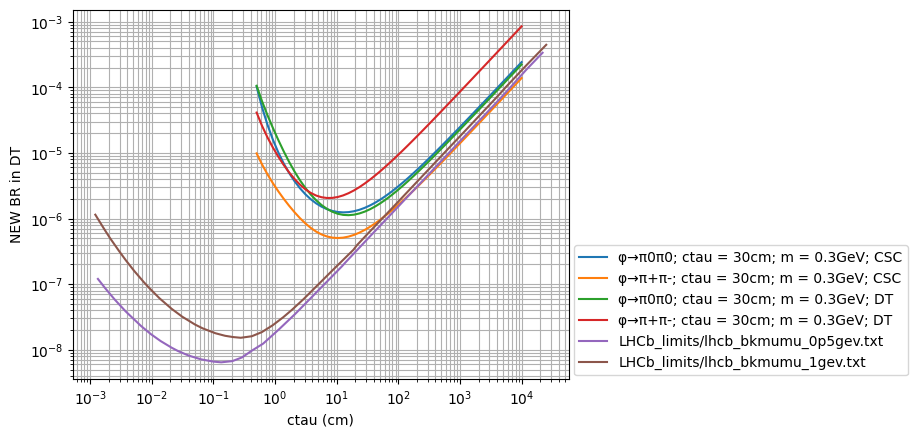

In [129]:
fig, ax = plt.subplots()
plotter('BR', 'NEW', 'CSC', ax)
plotter('BR', 'NEW', 'DT', ax)
# plotter('BR', 'OLD', 'CSC', ax)
# plotter('BR', 'OLD', 'DT', ax)
plot_file_data(ax, 'LHCb_limits/lhcb_bkmumu_0p5gev.txt')
plot_file_data(ax, 'LHCb_limits/lhcb_bkmumu_1gev.txt')
ax.legend(loc=(1.01,.01))
ax.grid(which='both')
plt.show()

In [162]:
cfDT = pd.DataFrame()
cfCSC = pd.DataFrame()

age = 'NEW'
sys = 'DT'
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    if 'background' not in signal:
        cfDT[f'{signal}'] = {x: y * muonfiltereff[age][sys][signal] * genfiltereff[age][sys][signal] * 472.8e9/4e-1 * 41.6 for x, y in nEvents_SF['NEW'][sys][signal].items()} 
    else:
        cfDT[f'{signal}'] = {x: y * 472.8e9/4e-1 * 41.6 for x, y in nEvents['NEW'][sys][signal].items()}
        
    cfDT[f'abs eff of {signal}'] = cfDT[f'{signal}']/cfDT[f'{signal}']['eventHLT_cut']
    cfDT[f'rel eff of {signal}'] = cfDT[f'{signal}']/cfDT[f'{signal}'].shift(1)
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    cfDT[f'eff ratio {signal}/bkg'] = cfDT[f'rel eff of {signal}']/cfDT[f'rel eff of background']

    
sys = 'CSC'
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    if 'background' not in signal:
        cfCSC[f'{signal}'] = {x: y * muonfiltereff[age][sys][signal] * genfiltereff[age][sys][signal] * 472.8e9/4e-1 * 41.6 for x, y in nEvents_SF['NEW'][sys][signal].items()} 
    else:
        cfCSC[f'{signal}'] = {x: y * 472.8e9/4e-1 * 41.6 for x, y in nEvents['NEW'][sys][signal].items()}

    cfCSC[f'abs eff of {signal}'] = cfCSC[f'{signal}']/cfCSC[f'{signal}']['posttrigger'] 
    cfCSC[f'rel eff of {signal}'] = cfCSC[f'{signal}']/cfCSC[f'{signal}'].shift(1)
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    cfCSC[f'eff ratio {signal}/bkg'] = cfCSC[f'rel eff of {signal}']/cfCSC[f'rel eff of background']

    
cfCSC.loc['cls_size > 130','background'] = float('NaN')
cfDT.loc['cluster_size_100','background'] = float('NaN')

In [168]:
cfDT = pd.DataFrame()
cfCSC = pd.DataFrame()

age = 'NEW'
sys = 'DT'
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    if 'background' not in signal:
        cfDT[f'{signal}'] = nEvents_SF['NEW'][sys][signal]
    else:
        cfDT[f'{signal}'] = nEvents['NEW'][sys][signal]
        
    cfDT[f'abs eff of {signal}'] = cfDT[f'{signal}']/cfDT[f'{signal}']['eventHLT_cut']
    cfDT[f'rel eff of {signal}'] = cfDT[f'{signal}']/cfDT[f'{signal}'].shift(1)
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    cfDT[f'eff ratio {signal}/bkg'] = cfDT[f'rel eff of {signal}']/cfDT[f'rel eff of background']

    
sys = 'CSC'
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    if 'background' not in signal:
        cfCSC[f'{signal}'] = nEvents_SF['NEW'][sys][signal]
    else:
        cfCSC[f'{signal}'] = nEvents['NEW'][sys][signal]

    cfCSC[f'abs eff of {signal}'] = cfCSC[f'{signal}']/cfCSC[f'{signal}']['posttrigger'] 
    cfCSC[f'rel eff of {signal}'] = cfCSC[f'{signal}']/cfCSC[f'{signal}'].shift(1)
for signal in ['background', 'PhiToPi0Pi0_mPhi0p3_ctau300']:
    cfCSC[f'eff ratio {signal}/bkg'] = cfCSC[f'rel eff of {signal}']/cfCSC[f'rel eff of background']

    
cfCSC.loc['cls_size > 130','abs eff of background'] = float('NaN')
cfDT.loc['cluster_size_100','abs eff of background'] = float('NaN')

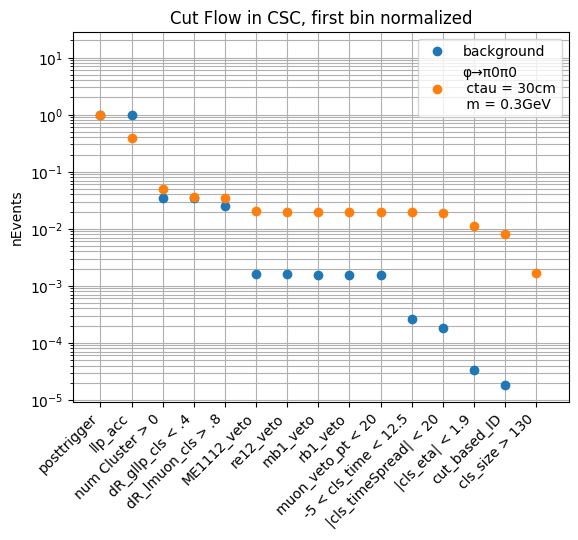

In [183]:
plt.plot(cfCSC['abs eff of background'],'o', label = 'background')
plt.plot(cfCSC['abs eff of PhiToPi0Pi0_mPhi0p3_ctau300'],'o', label = "φ→π0π0\n ctau = 30cm\n m = 0.3GeV")

plt.ylabel('nEvents')
plt.yscale('log')
l = plt.legend()
plt.grid(which='both')
plt.xticks(ha = 'right', rotation=45)
plt.xlim(left=6.11)

plt.title('Cut Flow in CSC, first bin normalized')

# l.get_texts()[1].set_va('center_baseline')

plt.show()

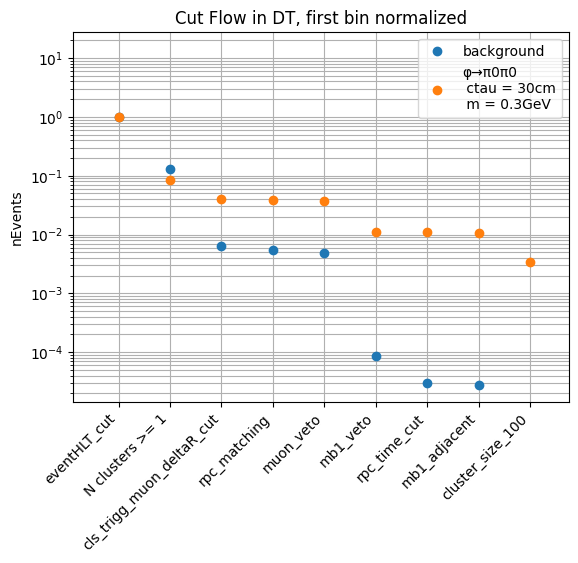

In [170]:
plt.plot(cfDT[['abs eff of background', 'abs eff of PhiToPi0Pi0_mPhi0p3_ctau300']],'o', label = ['background', "φ→π0π0\n ctau = 30cm\n m = 0.3GeV"])
plt.ylabel('nEvents')
plt.yscale('log')
l = plt.legend()
plt.grid(which='both')
plt.xticks(ha = 'right', rotation=45)
plt.xlim(left=6.11)

plt.title('Cut Flow in DT, first bin normalized')

# l.get_texts()[1].set_va('center_baseline')

plt.show()

In [ ]:
xticklabels

In [21]:
def cfplotter(cf, labelit = True):
    a=7
    fig, ax = plt.subplots(4,1, figsize = (a,2*a), sharex=True)
    fig.subplots_adjust(hspace=.03)
    for header in cf:
        if any(
            check in header for check in 
            ["PhiToPi0Pi0_mPhi0p3_ctau300", "PhiToPiPlusPiMinus_mPhi0p3_ctau300", 'background']
        ):
            if 'eff' not in header:
                ax[0].set_ylabel('nEvents')
                ax[0].plot(cf[header], 'o', label=header)

            if 'abs eff' in header:
                ax[1].set_ylabel('abs eff')
                ax[1].plot(cf[header], 'o', label=header[11:])

            if 'rel eff' in header:
                ax[2].set_ylabel('rel eff')
                ax[2].plot(cf[header], 'o--', label=header[11:])

            if 'eff ratio' in header:
                ax[3].set_ylabel('rel eff ratio')
                ax[3].plot(cf[header], 'o--', label=header[11:])


    [a.set_yscale('log') for a in ax]
    [a.grid(which='both') for a in ax]
    [a.set_xlim(left=6.5) for a in ax]
    if labelit:
        [a.legend(loc = (1.01,.5)) for a in ax]



    ax[1].set_ylim(1e-7, 2)
    ax[2].set_ylim(1e-2, 2)

    ax[0].xaxis.tick_top()
    ax[0].xaxis.set_tick_params(labeltop=True)
    plt.setp(ax[0].get_xticklabels(), rotation=90)
    ax[1].tick_params(axis='x', which='both', length=0)
    ax[2].tick_params(axis='x', which='both', length=0)
    plt.setp(ax[-1].get_xticklabels(), rotation=90)
    
    return ax

array([<AxesSubplot: ylabel='nEvents'>, <AxesSubplot: ylabel='abs eff'>,
       <AxesSubplot: ylabel='rel eff'>,
       <AxesSubplot: ylabel='rel eff ratio'>], dtype=object)

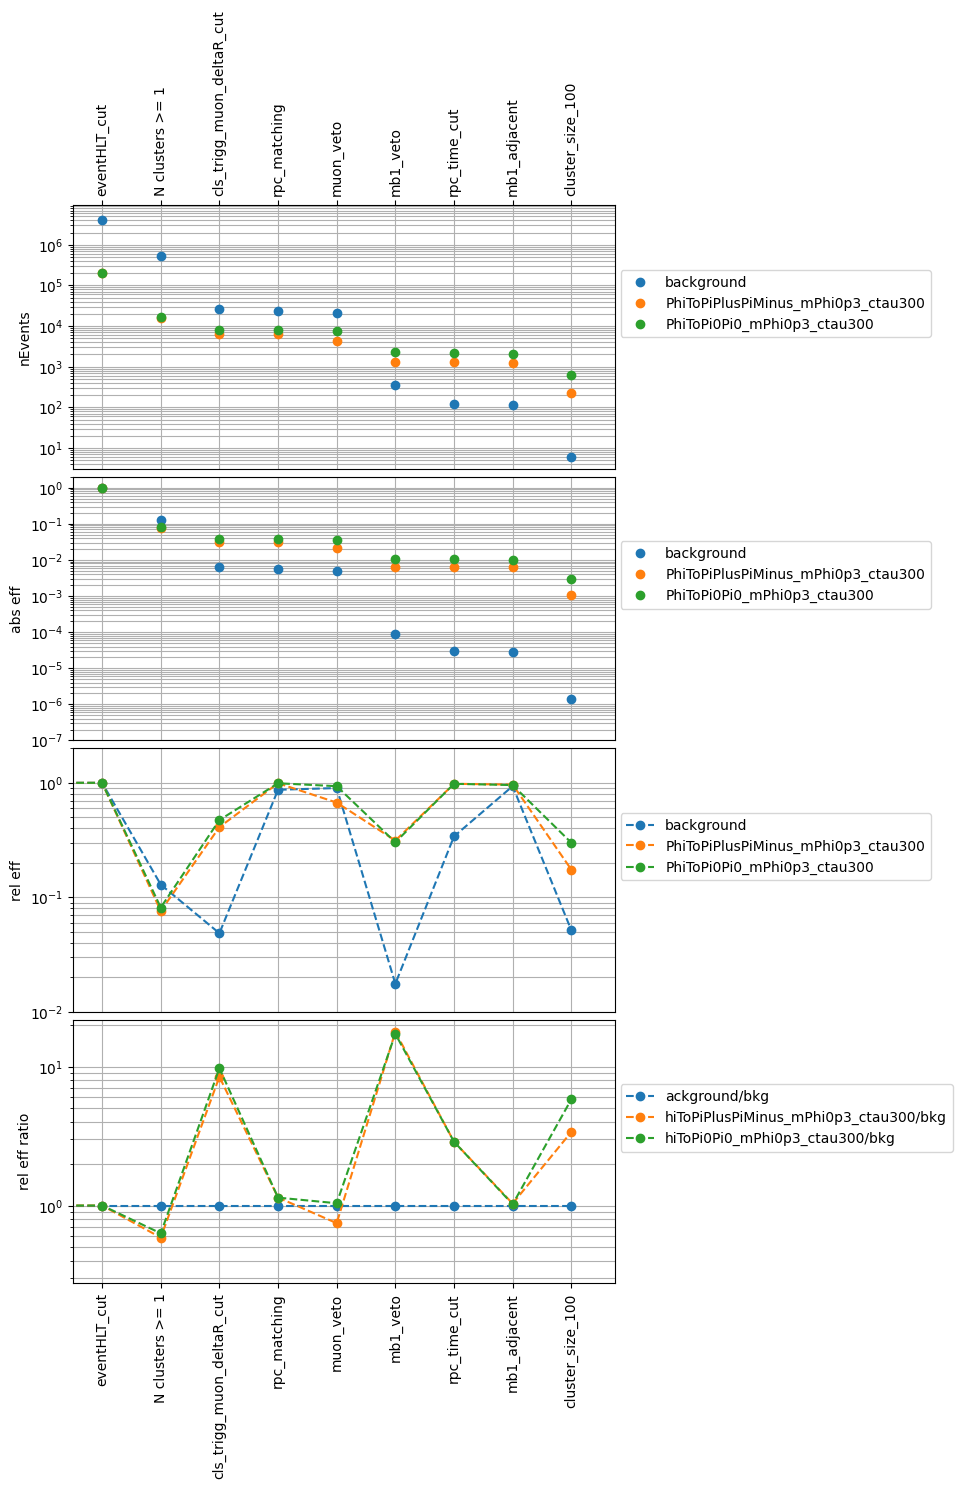

In [22]:
cfplotter(cfDT)

array([<AxesSubplot: ylabel='nEvents'>, <AxesSubplot: ylabel='abs eff'>,
       <AxesSubplot: ylabel='rel eff'>,
       <AxesSubplot: ylabel='rel eff ratio'>], dtype=object)

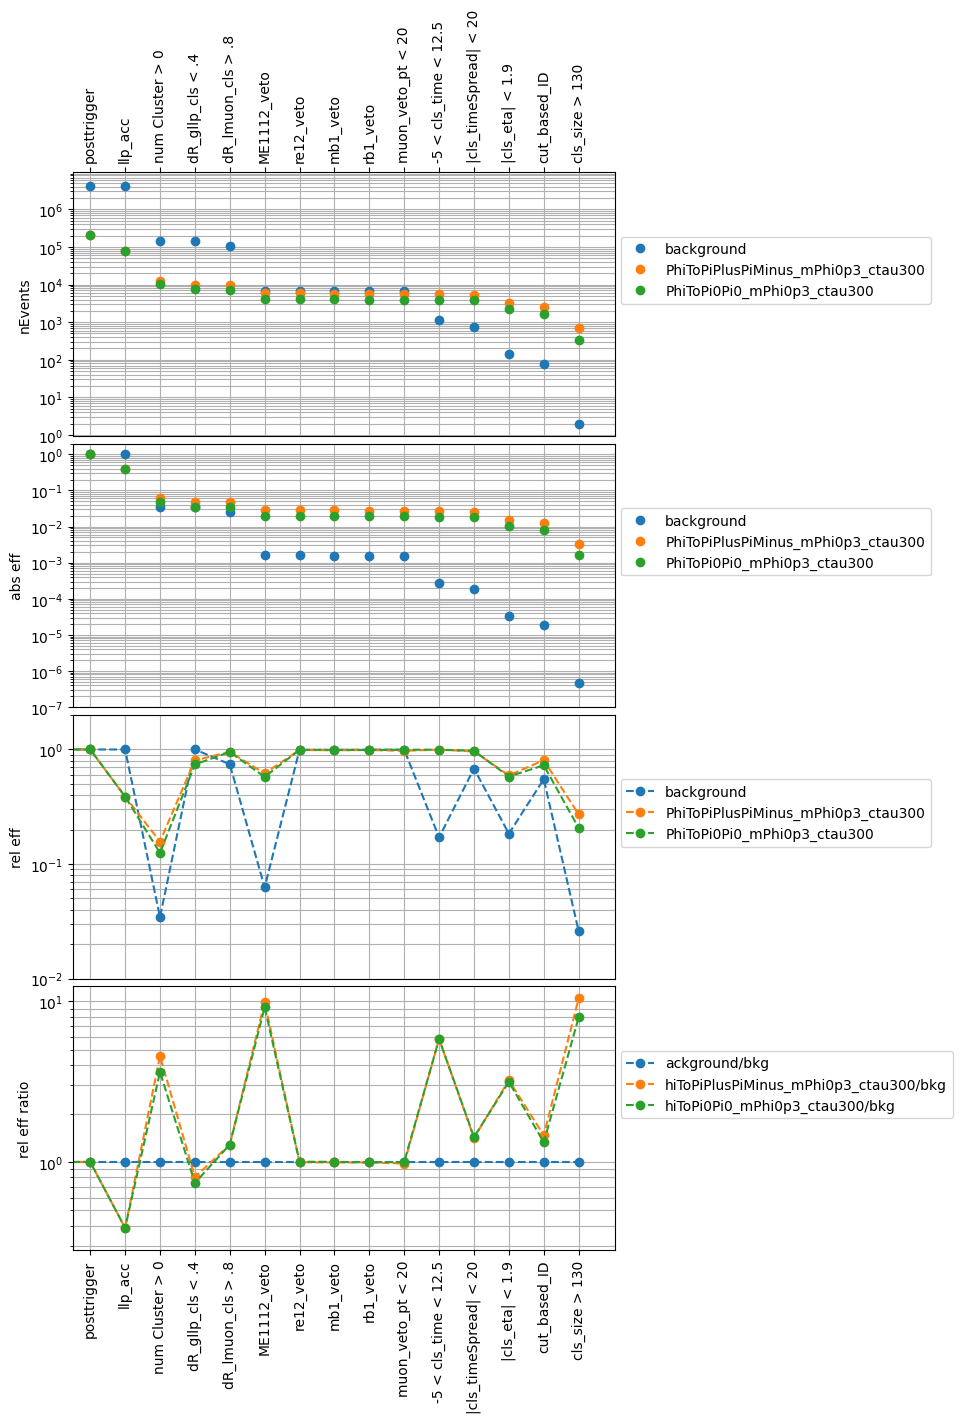

In [23]:
cfplotter(cfCSC)

In [ ]:
cfCSC[['background', "PhiToPi0Pi0_mPhi0p3_ctau300", "PhiToPiPlusPiMinus_mPhi0p3_ctau300"]]

In [ ]:
hists = {
    age: {
        sys: {
            dataset:{
                hist: data[age][sys][dataset][hist]
                for hist in data[age][sys][dataset]
                if isinstance(data[age][sys][dataset][hist], hs.hist.Hist)
            }
            for dataset in data[age][sys]
            if dataset[-4:] not in ['vars','cuts']             
        }
        for sys in data[age]
    }
    for age in data
}


In [ ]:
fig,ax = plt.subplots(9,1, figsize=(5,45))
i=0
for hist in hists['NEW']['DT']['background']:
    if 'dtRechitClusterSize' in hist:
        hist1 = hists['NEW']['DT']["PhiToPi0Pi0_mPhi0p3_ctau300"][hist]
        hist2 = hists['NEW']['DT']["PhiToPiPlusPiMinus_mPhi0p3_ctau300"][hist]
        
        hep.histplot(hist1, label='φ→π0π0; ctau = 30cm; m = 0.3GeV',ax=ax[i], density=True, yerr=True)
        hep.histplot(hist2, label='φ→π+π-; ctau = 30cm; m = 0.3GeV',ax=ax[i], density=True, yerr=True)
        ax[i].legend()#(loc = (1.01,.5))
        ax[i].set_ylabel(f'{hist[24:]} eff')
        i+=1

plt.show()
#plt.savefig('cf_nrechits_hists_dt.pdf')

In [ ]:
fig,ax = plt.subplots(15,1, figsize=(5,45*15/9))
i=0
for hist in hists['NEW']['CSC']['background']:
    if 'cscRechitClusterSize' in hist:
        hist1 = hists['NEW']['CSC']["PhiToPi0Pi0_mPhi0p3_ctau300"][hist]
        hist2 = hists['NEW']['CSC']["PhiToPiPlusPiMinus_mPhi0p3_ctau300"][hist]
        
        hep.histplot(hist1, label='φ→π0π0; ctau = 30cm; m = 0.3GeV',ax=ax[i], density=True, yerr=True)
        hep.histplot(hist2, label='φ→π+π-; ctau = 30cm; m = 0.3GeV',ax=ax[i], density=True, yerr=True)
        ax[i].legend()#(loc = (1.01,.5))
        ax[i].set_ylabel(f'{hist[25:]} eff')
        i+=1

plt.show()
#plt.savefig('cf_nrechits_hists_csc.pdf')

In [ ]:
gllp_limit['NEW']['CSC']['PhiToPi0Pi0_mPhi0p3_ctau300']['new_nEvents']

In [ ]:
plt.plot(
    gllp_limit['NEW']['CSC']['PhiToPi0Pi0_mPhi0p3_ctau300']['ctau_list'],
    gllp_limit['NEW']['CSC']['PhiToPi0Pi0_mPhi0p3_ctau300']['new_nEvents']
)

plt.yscale(

In [178]:
labels = {
    #"PhiToPi0Pi0_mPhi1p0_ctau1000":        "φ→π0π0; ctau = 100cm; m = 1.0GeV",
    #"PhiToPi0Pi0_mPhi0p3_ctau1000":        "φ→π+π-; ctau = 100cm; m = 0.3GeV",
    "PhiToPi0Pi0_mPhi0p3_ctau300":         f"φ→π0π0; ctau = 30cm; m = 0.3GeV",
    "PhiToPiPlusPiMinus_mPhi0p3_ctau300":  f"φ→π+π-; ctau = 30cm; m = 0.3GeV",
    #"PhiToPiPlusPiMinus_mPhi0p3_ctau1000": "φ→π0π0; ctau = 30cm; m = 0.3GeV"
}
ctausDT = gllp_limit['NEW']['DT'][sample]['ctau_list']


In [ ]:
labels = {
    #"PhiToPi0Pi0_mPhi1p0_ctau1000":        "φ→π0π0; ctau = 100cm; m = 1.0GeV",
    #"PhiToPi0Pi0_mPhi0p3_ctau1000":        "φ→π+π-; ctau = 100cm; m = 0.3GeV",
    "PhiToPi0Pi0_mPhi0p3_ctau300":         f"φ→π0π0; ctau = 30cm; m = 0.3GeV",
    "PhiToPiPlusPiMinus_mPhi0p3_ctau300":  f"φ→π+π-; ctau = 30cm; m = 0.3GeV",
    #"PhiToPiPlusPiMinus_mPhi0p3_ctau1000": "φ→π0π0; ctau = 30cm; m = 0.3GeV"
}

output = {
    sample:{}
    for sample in labels
}

error = {
    sample:{}
    for sample in labels
}

normlist = {
    sample:[]
    for sample in labels
}

for sample in labels:
    ctausCSC = gllp_limit['NEW']['CSC'][sample]['ctau_list']
    sigsCSC = gllp_limit['NEW']['CSC'][sample]['N_sig']
    bkgCSC = gllp_limit['NEW']['CSC'][sample]['N_bkg']
    BRCSC = gllp_limit['NEW']['CSC'][sample]['BR']

    ctausDT = gllp_limit['NEW']['DT'][sample]['ctau_list']
    sigsDT = gllp_limit['NEW']['DT'][sample]['N_sig']
    bkgDT = gllp_limit['NEW']['DT'][sample]['N_bkg']
    BRDT = gllp_limit['NEW']['DT'][sample]['BR']

    i = 0
    for sigCSC, ctauCSC, sigDT, ctauDT in zip(sigsCSC, ctausCSC, sigsDT, ctausDT):

        exponent = int(('{:e}'.format(sigCSC if sigCSC>sigDT else sigDT)).split('e')[-1])
        norm = 10**exponent
        normlist[sample].append(norm)

        bkg, sig, ctau = bkgCSC, sigCSC, ctauCSC
        width = max(len(str(bkg)), len(str(sig)))
        sCSC = f"""
            # ctau {ctau}
            # norm {norm}
            imax 1
            jmax 1
            kmax *
            ------------------------------------------------
            ------------------------------------------------
            bin          {'bin1':<{width}}
            observation  {bkg:<{width}}
            ------------------------------------------------
            bin          {'bin1':<{width}} {'bin1':<{width}}
            process      {'0':<{width}} {'1':<{width}}
            process      {'sig':<{width}} {'bkg':<{width}}
            rate         {sig/norm:<{width}} {bkg:<{width}}
            ------------------------------------------------
            lumiCSC lnN     {'1.1':<{width}} {'-':<{width}}
        """    

        bkg, sig, ctau = bkgDT, sigDT, ctauCSC
        width = max(len(str(bkg)), len(str(sig)))
        sDT = f"""
            # ctau {ctau}
            # norm {norm}
            imax 1
            jmax 1
            kmax *
            ------------------------------------------------
            ------------------------------------------------
            bin          {'bin1':<{width}}
            observation  {bkg:<{width}}
            ------------------------------------------------
            bin          {'bin1':<{width}} {'bin1':<{width}}
            process      {'0':<{width}} {'1':<{width}}
            process      {'sig':<{width}} {'bkg':<{width}}
            rate         {sig/norm:<{width}} {bkg:<{width}}
            ------------------------------------------------
            lumiDT lnN     {'1.1':<{width}} {'-':<{width}}
        """ 

        # fname = "{:.5E}".format(ctauCSC).replace("e", "E").replace(".", "P").replace("+", "p").replace("-", "m")
        with open(f"combineCSC/{i}", "w") as file:
            file.write(sCSC)

        with open(f"combineDT/{i}", "w") as file:
            file.write(sDT)
        
        i += 1
        
        
    cmds = [
        'source /cvmfs/cms.cern.ch/cmsset_default.sh',
        'cd ~/nobackup/CMSSW_11_3_4/src',
        'cmsenv',
        f'cd ~/nobackup/BToPhiK_Analysis',
    ]

    shell1 = sp.Popen(['/bin/bash'], stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.PIPE, universal_newlines=True, bufsize=0)
    shell2 = sp.Popen(['/bin/bash'], stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.PIPE, universal_newlines=True, bufsize=0)
    shell3 = sp.Popen(['/bin/bash'], stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.PIPE, universal_newlines=True, bufsize=0)


    for cmd in cmds:
        shell1.stdin.write(f"{cmd}\n")
        shell2.stdin.write(f"{cmd}\n")
        shell3.stdin.write(f"{cmd}\n")


    # fnames = ["{:.5E}".format(ctauCSC).replace("e", "E").replace(".", "P").replace("+", "p").replace("-", "m") +'.txt' for ctauCSC in ctausCSC]
    
#     for fname in fnames:
    for j in range(i):
        shell1.stdin.write(f"combineCards.py DT=combineCSC/{j} CSC=combineDT/{j} > combined/{j}\n")
        shell1.stdin.write(f"combine -M AsymptoticLimits --run expected -d combined/{j} -t -1  -v 1 --expectSignal 1\n")
        shell2.stdin.write(f"combine -M AsymptoticLimits --run expected -d combineDT/{j} -t -1  -v 1 --expectSignal 1\n")
        shell3.stdin.write(f"combine -M AsymptoticLimits --run expected -d combineCSC/{j} -t -1  -v 1 --expectSignal 1\n")


    
    output1, error1 = shell1.communicate()
    output2, error2 = shell2.communicate()
    output3, error3 = shell3.communicate()
    
    output[sample]['combined'] = output1
    output[sample]['DT'] = output2
    output[sample]['CSC'] = output3

In [ ]:
output

In [ ]:
with open("combineoutput.pkl", "wb") as f:
    pickle.dump(output, f)
    
with open("norms.pkl", "wb") as f:
    pickle.dump(normlist, f)

In [174]:
with open("combineoutput.pkl", "rb") as f:
    output = pickle.load(f)
    
with open("norms.pkl", "rb") as f:
    normlist = pickle.load(f)

In [175]:
r = {
    sample: {
        card: {
        '2.5%':[],'16.0%':[],'50.0%':[],'84.0%':[],'97.5%':[]
        }
        for card in ['combined','DT','CSC']
    }
    for sample in labels
}

for sample in r:
    for card in r[sample]:
        for perc in r[sample][card]:
            for line in output[sample][card].splitlines():
                if perc in line:
                    num = float(line.split(' ')[-1])
                    r[sample][card][perc].append(num)
        
for sample in r:
    for card in r[sample]:
        for perc in r[sample][card]:
            for i in range(len(r[sample][card][perc])):
                r[sample][card][perc][i] /= normlist[sample][i]

In [ ]:
output

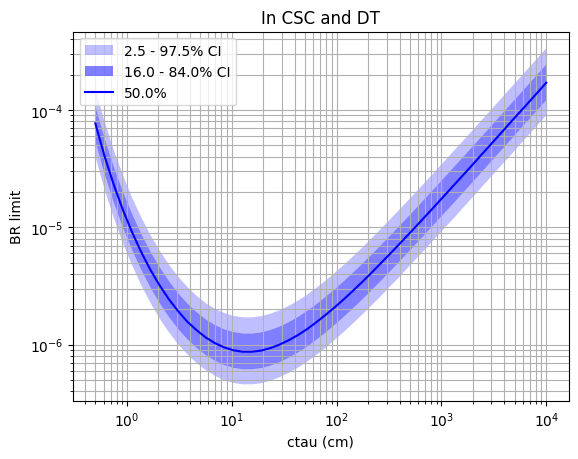

In [179]:
sample, card = "PhiToPi0Pi0_mPhi0p3_ctau300", 'combined'
plt.fill_between(ctausDT, r[sample][card]['2.5%'], r[sample][card]['16.0%'], color = 'blue', alpha = .25, edgecolor = 'none', label = '2.5 - 97.5% CI')
plt.fill_between(ctausDT, r[sample][card]['16.0%'], r[sample][card]['50.0%'], color = 'blue', alpha = .5, edgecolor = 'none', label = '16.0 - 84.0% CI')

plt.fill_between(ctausDT, r[sample][card]['50.0%'], r[sample][card]['84.0%'], color = 'blue', alpha = .5, edgecolor = 'none')
plt.fill_between(ctausDT, r[sample][card]['84.0%'], r[sample][card]['97.5%'], color = 'blue', alpha = .25, edgecolor = 'none')
plt.plot(ctausDT,r[sample][card]['50.0%'], color='blue', label = '50.0%')


#plt.plot(ctausDT, BR, color = 'red', label = 'Estimate')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('BR limit')
plt.xlabel('ctau (cm)')
plt.grid(which='both')
plt.title('In CSC and DT')
plt.show()

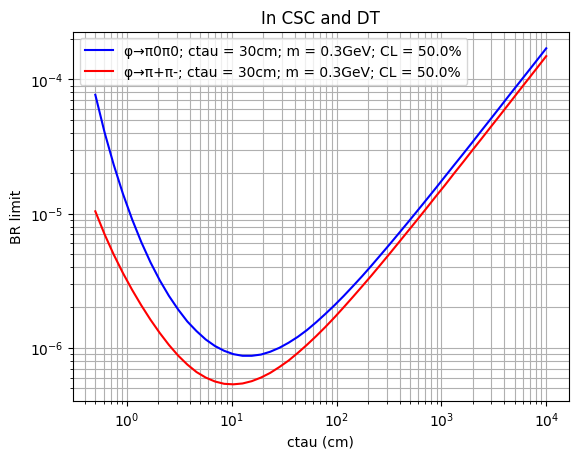

In [180]:
sample, card = "PhiToPi0Pi0_mPhi0p3_ctau300", 'combined'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='blue', label = f'{labels[sample]}; CL = 50.0%')

sample, card = "PhiToPiPlusPiMinus_mPhi0p3_ctau300", 'combined'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='red', label = f'{labels[sample]}; CL = 50.0%')
    
#plt.plot(ctausDT, BR, color = 'red', label = 'Estimate')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('BR limit')
plt.xlabel('ctau (cm)')
plt.grid(which='both')
plt.title('In CSC and DT')
plt.show()

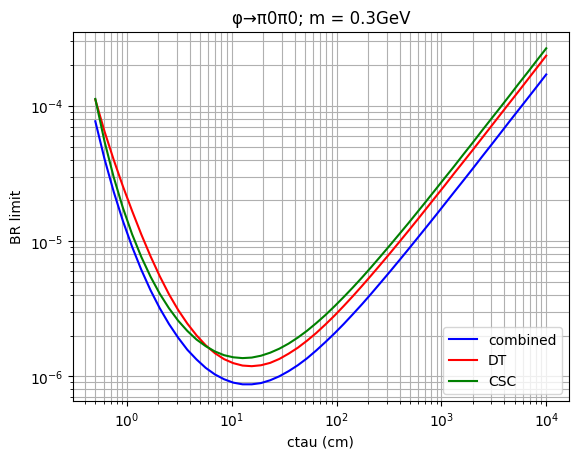

In [182]:
sample, card = "PhiToPi0Pi0_mPhi0p3_ctau300", 'combined'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='blue', label = f'{card}')

sample, card = "PhiToPi0Pi0_mPhi0p3_ctau300", 'DT'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='red', label = f'{card}')

sample, card = "PhiToPi0Pi0_mPhi0p3_ctau300", 'CSC'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='green', label = f'{card}')
    
#plt.plot(ctausDT, BR, color = 'red', label = 'Estimate')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('BR limit')
plt.xlabel('ctau (cm)')
plt.grid(which='both')
plt.title('φ→π0π0; m = 0.3GeV')
plt.show()

In [ ]:
sample, card = "PhiToPiPlusPiMinus_mPhi0p3_ctau300", 'combined'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='blue', label = f'{card}; CL = 50.0%')

sample, card = "PhiToPiPlusPiMinus_mPhi0p3_ctau300", 'DT'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='red', label = f'{card}; CL = 50.0%')

sample, card = "PhiToPiPlusPiMinus_mPhi0p3_ctau300", 'CSC'

plt.plot(ctausDT,r[sample][card]['50.0%'], color='green', label = f'{card}; CL = 50.0%')
    
#plt.plot(ctausDT, BR, color = 'red', label = 'Estimate')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('BR limit')
plt.xlabel('ctau (cm)')
plt.grid(which='both')
plt.title(labels[sample])
plt.show()